<font color='green'>
Notice this is a markdown section, not code.

Keys - Enter to move to next line.
Shift - Enter to execute this section

Shift - Tab for intellisense


In [2]:
print('test')

test


In [3]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import os

%matplotlib inline

In [4]:
#read in CSV File 
#df = pd.read_csv("./SouthDenver_10Parcels_400Sales.csv")
df = pd.read_csv("./SalesBook2013_2-10-20NBHD_71.csv")


In [5]:
df.shape

(285, 12)

In [6]:
df.head(5)

,NBHD,LIVEAREA,FINBSMNT,BASEMENT,CONDITION,CONDITION_ADJ,QUALITY_ADJ,QUALITY,NOCARS,NUMBDRM,NUMBATHS,NETPRICE
0,715,2558,0,0,Good,1,1,B,0,2,3,1025000
1,711,3176,250,313,Good,1,1,B,5,4,3,852000
2,712,3179,1474,1972,AVG,0,1,B,2,4,4,730611
3,713,2291,2176,2291,Good,1,1,B,2,2,3,675000
4,713,2740,1020,1396,Good,1,1,B,2,3,4,655000


<font color='green'>Cheated here.. I did find a null falue.. stole someone else's code

In [7]:
df.isnull().any()

NBHD             False
LIVEAREA         False
FINBSMNT         False
BASEMENT         False
CONDITION        False
CONDITION_ADJ    False
QUALITY_ADJ      False
QUALITY          False
NOCARS           False
NUMBDRM          False
NUMBATHS         False
NETPRICE         False
dtype: bool

In [8]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

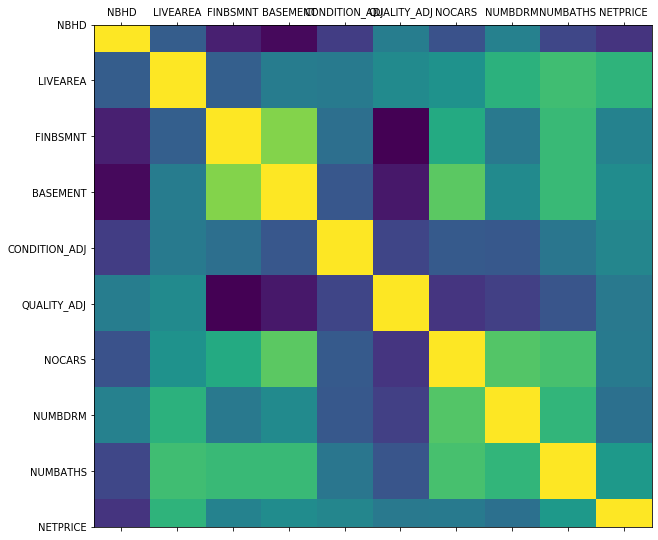

In [9]:
plot_corr(df)

In [10]:
df.corr()

,NBHD,LIVEAREA,FINBSMNT,BASEMENT,CONDITION_ADJ,QUALITY_ADJ,NOCARS,NUMBDRM,NUMBATHS,NETPRICE
NBHD,1.000000,0.061472,-0.211152,-0.296919,-0.086730,0.234183,0.004377,0.254781,-0.047021,-0.127704
LIVEAREA,0.061472,1.000000,0.072939,0.231224,0.216803,0.309131,0.350102,0.525849,0.592913,0.534935
FINBSMNT,-0.211152,0.072939,1.000000,0.755823,0.157817,-0.328384,0.482032,0.208100,0.569808,0.259089
BASEMENT,-0.296919,0.231224,0.755823,1.000000,0.034549,-0.243800,0.666091,0.306972,0.571467,0.315914
CONDITION_ADJ,-0.086730,0.216803,0.157817,0.034549,1.000000,-0.050479,0.049501,0.039391,0.191101,0.282759
QUALITY_ADJ,0.234183,0.309131,-0.328384,-0.243800,-0.050479,1.000000,-0.122634,-0.076705,0.019627,0.210970
NOCARS,0.004377,0.350102,0.482032,0.666091,0.049501,-0.122634,1.000000,0.643159,0.610915,0.218027
NUMBDRM,0.254781,0.525849,0.208100,0.306972,0.039391,-0.076705,0.643159,1.000000,0.544765,0.160514
NUMBATHS,-0.047021,0.592913,0.569808,0.571467,0.191101,0.019627,0.610915,0.544765,1.000000,0.390439
NETPRICE,-0.127704,0.534935,0.259089,0.315914,0.282759,0.210970,0.218027,0.160514,0.390439,1.000000


<font color='green'>had to remove date, type was confusing.. shouldn't really be used anyway

In [20]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
feature_col_names = ['LIVEAREA','FINBSMNT','BASEMENT','NUMBDRM','NUMBATHS' ,'CONDITION_ADJ', 'QUALITY_ADJ','NOCARS']
predicted_class_names = ['NETPRICE']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

In [21]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.82% in training set
30.18% in test set


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
rf_modelLR = LinearRegression()      # Create random forest object
rf_modelLR.fit(X_train, y_train.ravel()) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
rf_predict_trainLR = rf_modelLR.predict(X_train)

rmse = mean_squared_error(y_train, rf_predict_trainLR)
r2 = r2_score(y_train, rf_predict_trainLR)


# training metrics
print('Slope:' ,rf_modelLR.coef_)
print('Intercept:', rf_modelLR.intercept_)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 1.30006882e+02  3.84476886e+01  3.49723438e+01 -1.83918558e+04
 -1.79868688e+04  4.71555581e+04  4.27286183e+04 -1.31167715e+03]
Intercept: 82789.34839244606
Root mean squared error:  9330811583.44573
R2 score:  0.36932902659251565


In [25]:
rf_modelLRTest = LinearRegression()      # Create random forest object
rf_modelLRTest.fit(X_test, y_test.ravel()) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
rf_predict_trainLRTest = rf_modelLRTest.predict(X_test)

rmseTest = mean_squared_error(y_test, rf_predict_trainLRTest)
r2Test = r2_score(y_test, rf_predict_trainLRTest)


# training metrics
print('Slope:' ,rf_modelLRTest.coef_)
print('Intercept:', rf_modelLRTest.intercept_)

print('Root mean squared error: ', rmseTest)
print('R2 score: ',r2Test)

Slope: [ 9.17967797e+01  4.81198691e+01  4.63984758e+01 -1.71018932e+04
  1.05381471e+04  5.01409535e+04  6.02591756e+04 -1.22150664e+04]
Intercept: 64337.003381224524
Root mean squared error:  5428702098.566381
R2 score:  0.551281691313371
